# Stack Overflow Data EDA and Text Generation 
- Joel Stremmel
- 01-14-20

**About:**

This notebook explores the Stack Overflow data available through `tff.simulation.datasets` with some basic EDA.

**Data:** 
- https://www.kaggle.com/stackoverflow/stackoverflow
- https://www.tensorflow.org/federated/api_docs/python/tff/simulation/datasets/stackoverflow/load_data

**License:** 
- https://creativecommons.org/licenses/by-sa/3.0/

In [1]:
# !pip install --upgrade pip
# !pip install --upgrade tensorflow-federated
# !pip uninstall tensorflow -y
# !pip install --upgrade tensorflow-gpu==2.0
# !pip install --upgrade nltk
# !pip install matplotlib
# !pip install nest_asyncio

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
import collections
import functools
import os
import six
import time
import string

import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [4]:
import tensorflow_federated as tff
import tensorflow as tf

In [5]:
tf.compat.v1.enable_v2_behavior()

In [6]:
np.random.seed(0)

### Test TFF

In [7]:
tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

### Load Stack Overflow Word Counts

In [8]:
word_counts = tff.simulation.datasets.stackoverflow.load_word_counts(cache_dir='~/data')

### Number of Words

In [9]:
len(word_counts)

6005329

### Create Dictionary of Counts

In [10]:
count_dict = collections.Counter(word_counts)

### Create Function to Plot Word Frequency

In [11]:
def plot_ordered_frequency(count_dict, n, color='orange'):
    
    top_words = collections.OrderedDict(sorted(count_dict.most_common(n), key=lambda x: x[1]))
    
    plt.figure(figsize=(8, 16))
    plt.barh(range(len(top_words)), list(top_words.values()), align='center', color=color)
    plt.yticks(range(len(top_words)), list(top_words.keys()))
    
    plt.title('Most Common Words', size=18)
    plt.xlabel('Count of Occurrences', size=18)
    plt.ylabel('Words', size=18)

    plt.show()

### Plot Raw Frequency of Words

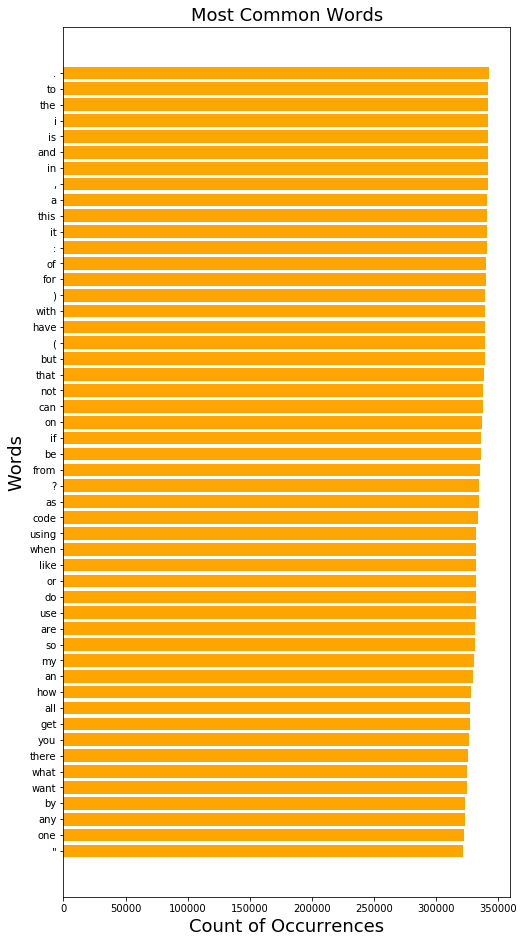

In [12]:
plot_ordered_frequency(count_dict, n=50)

### Clean Dictionary by:
- Removing Stopwords
- Removing Punctuation

In [13]:
for stopword in stopwords.words('english'):
    count_dict.pop(stopword, None)

In [14]:
for punctuation in string.punctuation:
    count_dict.pop(punctuation, None)

### Plot Frequency of Filtered Words

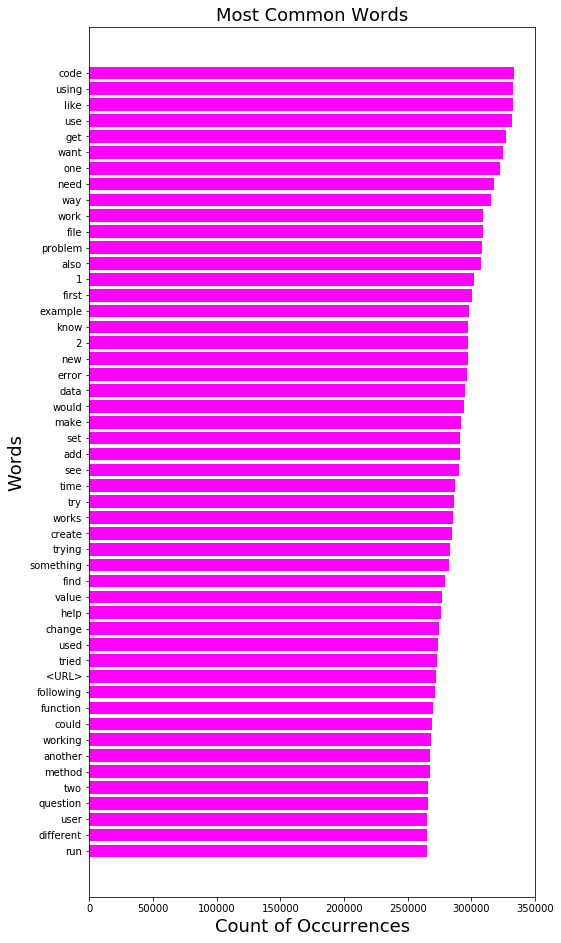

In [15]:
plot_ordered_frequency(count_dict, n=50, color='magenta')

### View Some Rare Words

In [16]:
count_dict.most_common()[-10:-1]

[('zzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 1),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 1)]

### Compute Summary Statistics

In [17]:
counts = list(count_dict.values())
min_occurrences = min(counts)
max_occurrences = max(counts)
mean_occurrences = np.mean(counts)
median_occurrences = np.median(counts)
stdv_occurrences = np.std(counts)
print('Minimum number of occurrences: {}'.format(min_occurrences))
print('Maximum number of occurrences: {}'.format(max_occurrences))
print('Mean number of occurrences: {}'.format(round(mean_occurrences, 3)))
print('Median number of occurrences: {}'.format(round(median_occurrences, 3)))
print('Standard Deviation of occurrences: {}'.format(round(stdv_occurrences, 3)))

Minimum number of occurrences: 1
Maximum number of occurrences: 333526
Mean number of occurrences: 45.946
Median number of occurrences: 1.0
Standard Deviation of occurrences: 1946.294


### Plot Histogram of Counts
- First with the raw counts
- Then with the log of the counts due to the increasingly small number of large values

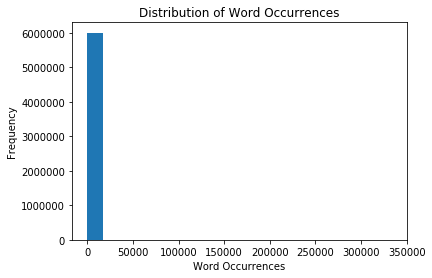

In [18]:
plt.hist(counts, bins=20)
plt.title('Distribution of Word Occurrences')
plt.xlabel('Word Occurrences')
plt.ylabel('Frequency')
plt.show()

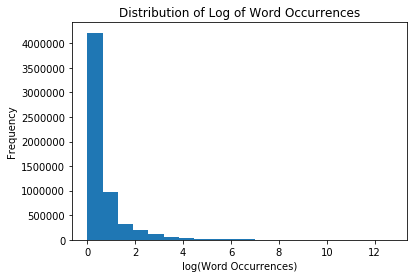

In [19]:
fig, ax = plt.subplots(1,1)
plt.hist(np.log(counts), bins=20)
plt.title('Distribution of Log of Word Occurrences')
plt.xlabel('log(Word Occurrences)')
plt.ylabel('Frequency')
plt.show()